In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [97]:
import os
os.getcwd()


'C:\\Users\\hp'

**DATA COLLECTION**

In [98]:
df=pd.read_csv("Travel.csv")

In [99]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


**DATA CLEANING**

##HANDLING missing values##

In [100]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [101]:
##check all the categories present
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [102]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [103]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [104]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [105]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [106]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')      

In [107]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [108]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [109]:
 df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [110]:
##Check missing values
## features with nan value
F_with_na=[features for features in df.columns if df[features].isnull().sum()>0]
F_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [111]:
for feature in F_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [112]:
#statistical on numerical columns (Null cols)
df[F_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [113]:

df.Age.fillna(df.Age.median(),inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [114]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [115]:
df.drop('CustomerID', inplace=True,axis=1)

In [116]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


*Feature Engineering*                                                                                                            
Feature Extraction

In [117]:
#Create a new column which includes visiting to avoid 2 unncessary columns

In [118]:
df['TotalVisiting']=df['NumberOfChildrenVisiting']+ df['NumberOfPersonVisiting']

In [119]:
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],inplace=True,axis=1)

In [120]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [121]:
#get all the numerical features
num_features=[features for features in df.columns if df[features].dtype!='O']


In [122]:
num_features

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'TotalVisiting']

In [123]:
print('number of numerical features',len(num_features))

number of numerical features 12


In [124]:
#category features
category_features=[features for features in df.columns if df[features].dtype=='O']
print('number of category features',len(category_features))

number of category features 6


In [125]:
#discrete features ( 6-7 or more categories instead of just 2 or 3)
discrete_features=[features for features in num_features if len(df[features].unique())<=25]
print('number of discrete features',len(discrete_features))

number of discrete features 9


In [126]:
#continous features
continous_features=[features for features in num_features if features not in discrete_features]
print('number of continous features',len(continous_features))

number of continous features 3


In [127]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


#train test split and model training#

In [128]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
Y=df['ProdTaken']

In [129]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [130]:
Y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [131]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [132]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [133]:
#Create Column Transformer with 3 types of transformers
cat_features=X.select_dtypes(include="object").columns
num_features=X.select_dtypes(exclude="object").columns

In [134]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

One_trans=OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()

preprocessor= ColumnTransformer(
    [
        ('OneHotEncoder', One_trans, cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]

)

    

In [135]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [136]:
#applying transformation on training dataset
x_train=preprocessor.fit_transform(x_train)

In [137]:
x_test=preprocessor.transform(x_test)

In [138]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.711953,-0.782625,-0.713603,0.530883,0.434216,-0.644305,0.678514,0.784667,-0.226963,-1.496955
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-0.711953,0.664499,0.293685,-0.727912,-0.681646,-0.644305,-1.518275,0.784667,0.369702,-0.080598
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.711953,-0.782625,0.293685,0.530883,-0.681646,-0.644305,1.410777,0.784667,-0.265800,0.627580
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.711953,-1.023812,-1.720892,-0.727912,-0.681646,-0.644305,-0.053749,0.784667,0.010892,2.043937
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,-0.711953,0.302718,1.300974,1.789679,0.434216,1.552061,1.410777,0.784667,0.973903,2.043937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.711953,-0.300250,-0.713603,0.530883,-0.123715,-0.644305,-1.518275,-1.274426,-1.257601,0.627580
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.711953,1.026280,0.293685,-0.727912,-0.123715,1.552061,1.410777,0.784667,-0.473319,-0.080598
3907,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.711953,-0.300250,-0.713603,1.789679,1.550078,1.552061,-0.053749,-1.274426,-0.226963,-0.788777
3908,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.711953,0.061531,1.300974,1.789679,-0.681646,1.552061,-0.053749,-1.274426,-0.487424,0.627580


*Random Forest Classifier Training*

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, \
recall_score, f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [150]:
models= {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


for model_name, model in models.items():
    model.fit(x_train,y_train) #train model
    
    #Make predictions
    y_train_pred= model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred,average='weighted')
    model_train_precision= precision_score(y_train, y_train_pred)
    model_train_recall=recall_score(y_train, y_train_pred)
    model_train_rocauc_score= roc_auc_score(y_train, y_train_pred)

    #test set performance
    
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(model_name)

    print('Model performance for training set')
    print("Accuracy:{:.4f}".format(model_train_accuracy))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("F1 Score: {:.4f}".format(model_train_f1))
    print("ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print('Model performance for test set')
    print("Accuracy: {:.4f}".format(model_test_accuracy))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("F1 Score: {:.4f}".format(model_test_f1))
    print("ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Logistic Regression
Model performance for training set
Accuracy:0.8460
Precision: 0.7116
Recall: 0.3478
F1 Score: 0.8241
ROC AUC Score: 0.6569
Model performance for test set
Accuracy: 0.8517
Precision: 0.5930
Recall: 0.3168
F1 Score: 0.8325
ROC AUC Score: 0.6370


Decision Tree
Model performance for training set
Accuracy:1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000
Model performance for test set
Accuracy: 0.8916
Precision: 0.6382
Recall: 0.7888
F1 Score: 0.8960
ROC AUC Score: 0.8503


Random Forest
Model performance for training set
Accuracy:1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000
Model performance for test set
Accuracy: 0.9376
Precision: 0.9386
Recall: 0.6646
F1 Score: 0.9332
ROC AUC Score: 0.8280




In [151]:
##Hyperparameter Tuning
rf_params = {"max_depth": [5,8,15,None,10],
             "max_features": [5,7,"auto",8],
             "min_samples_split":[2,8,15,20],
             "n_estimators": [100,200,500,1000]}




In [152]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [154]:
#Models list for hyperparameter tuning
randomcv_models=[
                ("RF", RandomForestClassifier(), rf_params)
]


In [155]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [157]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"--------------Best Params for {model_name}-------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------Best Params for RF-------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [158]:
model= {
    "Random Forest" : RandomForestClassifier(n_estimators=200,min_samples_split=2, max_features=8, max_depth=15)
}
for model_name, model in models.items():
    model.fit(x_train,y_train) #train model
    
    #Make predictions
    y_train_pred= model.predict(x_train)
    y_test_pred=model.predict(x_test)

    #training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred,average='weighted')
    model_train_precision= precision_score(y_train, y_train_pred)
    model_train_recall=recall_score(y_train, y_train_pred)
    model_train_rocauc_score= roc_auc_score(y_train, y_train_pred)

    #test set performance
    
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)

    print(model_name)

    print('Model performance for training set')
    print("Accuracy:{:.4f}".format(model_train_accuracy))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("F1 Score: {:.4f}".format(model_train_f1))
    print("ROC AUC Score: {:.4f}".format(model_train_rocauc_score))

    print('Model performance for test set')
    print("Accuracy: {:.4f}".format(model_test_accuracy))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("F1 Score: {:.4f}".format(model_test_f1))
    print("ROC AUC Score: {:.4f}".format(model_test_rocauc_score))

    print('='*35)
    print('\n')

Logistic Regression
Model performance for training set
Accuracy:0.8460
Precision: 0.7116
Recall: 0.3478
F1 Score: 0.8241
ROC AUC Score: 0.6569
Model performance for test set
Accuracy: 0.8517
Precision: 0.5930
Recall: 0.3168
F1 Score: 0.8325
ROC AUC Score: 0.6370


Decision Tree
Model performance for training set
Accuracy:1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000
Model performance for test set
Accuracy: 0.9162
Precision: 0.7158
Recall: 0.8137
F1 Score: 0.9183
ROC AUC Score: 0.8750


Random Forest
Model performance for training set
Accuracy:1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000
Model performance for test set
Accuracy: 0.9346
Precision: 0.9450
Recall: 0.6398
F1 Score: 0.9293
ROC AUC Score: 0.8162




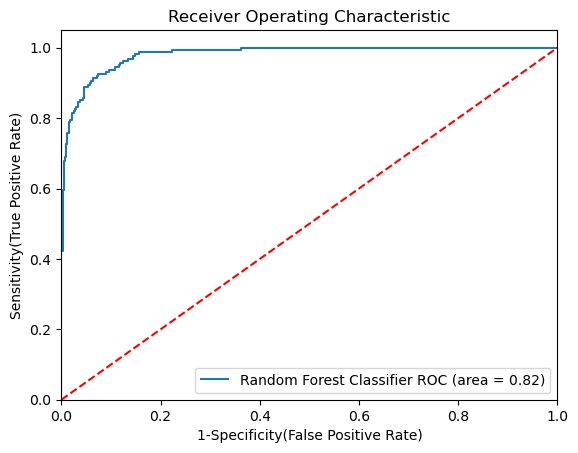

In [159]:
plt.figure()

#Add the models to the list that you want to view on the ROC plot
auc_models=[
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=200,min_samples_split=2, max_features=8, max_depth=15),
        'auc': 0.8162
    },
]
#create loop through all model
for algo in auc_models:
    model=algo['model']#select the model
    model.fit(x_train,y_train) #train the model
    #compute false positive rate and true positive rate
    fpr, tpr, thresholds= roc_curve(y_test, model.predict_proba(x_test)[:,1])
    #calculate area under the curve to display on the plot
    plt.plot(fpr,tpr,label='%s ROC (area = %0.2f)' % (algo['label'],algo['auc']))
#Custom setting for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 
    